In [38]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
import matplotlib.pyplot as plt

In [49]:
creditcard_data = pd.read_csv("creditcard.csv")

In [50]:
creditcard_data.describe()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
count,284807.000000,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,...,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,284807.000000,284807.000000
mean,94813.859575,3.918649e-15,5.682686e-16,-8.761736e-15,2.811118e-15,-1.552103e-15,2.040130e-15,-1.698953e-15,-1.893285e-16,-3.147640e-15,...,1.473120e-16,8.042109e-16,5.282512e-16,4.456271e-15,1.426896e-15,1.701640e-15,-3.662252e-16,-1.217809e-16,88.349619,0.001727
std,47488.145955,1.958696e+00,1.651309e+00,1.516255e+00,1.415869e+00,1.380247e+00,1.332271e+00,1.237094e+00,1.194353e+00,1.098632e+00,...,7.345240e-01,7.257016e-01,6.244603e-01,6.056471e-01,5.212781e-01,4.822270e-01,4.036325e-01,3.300833e-01,250.120109,0.041527
min,0.000000,-5.640751e+01,-7.271573e+01,-4.832559e+01,-5.683171e+00,-1.137433e+02,-2.616051e+01,-4.355724e+01,-7.321672e+01,-1.343407e+01,...,-3.483038e+01,-1.093314e+01,-4.480774e+01,-2.836627e+00,-1.029540e+01,-2.604551e+00,-2.256568e+01,-1.543008e+01,0.000000,0.000000
25%,54201.500000,-9.203734e-01,-5.985499e-01,-8.903648e-01,-8.486401e-01,-6.915971e-01,-7.682956e-01,-5.540759e-01,-2.086297e-01,-6.430976e-01,...,-2.283949e-01,-5.423504e-01,-1.618463e-01,-3.545861e-01,-3.171451e-01,-3.269839e-01,-7.083953e-02,-5.295979e-02,5.600000,0.000000
50%,84692.000000,1.810880e-02,6.548556e-02,1.798463e-01,-1.984653e-02,-5.433583e-02,-2.741871e-01,4.010308e-02,2.235804e-02,-5.142873e-02,...,-2.945017e-02,6.781943e-03,-1.119293e-02,4.097606e-02,1.659350e-02,-5.213911e-02,1.342146e-03,1.124383e-02,22.000000,0.000000
75%,139320.500000,1.315642e+00,8.037239e-01,1.027196e+00,7.433413e-01,6.119264e-01,3.985649e-01,5.704361e-01,3.273459e-01,5.971390e-01,...,1.863772e-01,5.285536e-01,1.476421e-01,4.395266e-01,3.507156e-01,2.409522e-01,9.104512e-02,7.827995e-02,77.165000,0.000000
max,172792.000000,2.454930e+00,2.205773e+01,9.382558e+00,1.687534e+01,3.480167e+01,7.330163e+01,1.205895e+02,2.000721e+01,1.559499e+01,...,2.720284e+01,1.050309e+01,2.252841e+01,4.584549e+00,7.519589e+00,3.517346e+00,3.161220e+01,3.384781e+01,25691.160000,1.000000


In [51]:
creditcard_data.tail()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
284802,172786.0,-11.881118,10.071785,-9.834783,-2.066656,-5.364473,-2.606837,-4.918215,7.305334,1.914428,...,0.213454,0.111864,1.014480,-0.509348,1.436807,0.250034,0.943651,0.823731,0.77,0
284803,172787.0,-0.732789,-0.055080,2.035030,-0.738589,0.868229,1.058415,0.024330,0.294869,0.584800,...,0.214205,0.924384,0.012463,-1.016226,-0.606624,-0.395255,0.068472,-0.053527,24.79,0
284804,172788.0,1.919565,-0.301254,-3.249640,-0.557828,2.630515,3.031260,-0.296827,0.708417,0.432454,...,0.232045,0.578229,-0.037501,0.640134,0.265745,-0.087371,0.004455,-0.026561,67.88,0
284805,172788.0,-0.240440,0.530483,0.702510,0.689799,-0.377961,0.623708,-0.686180,0.679145,0.392087,...,0.265245,0.800049,-0.163298,0.123205,-0.569159,0.546668,0.108821,0.104533,10.00,0
284806,172792.0,-0.533413,-0.189733,0.703337,-0.506271,-0.012546,-0.649617,1.577006,-0.414650,0.486180,...,0.261057,0.643078,0.376777,0.008797,-0.473649,-0.818267,-0.002415,0.013649,217.00,0


In [11]:
creditcard_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 284807 entries, 0 to 284806
Data columns (total 31 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   Time    284807 non-null  float64
 1   V1      284807 non-null  float64
 2   V2      284807 non-null  float64
 3   V3      284807 non-null  float64
 4   V4      284807 non-null  float64
 5   V5      284807 non-null  float64
 6   V6      284807 non-null  float64
 7   V7      284807 non-null  float64
 8   V8      284807 non-null  float64
 9   V9      284807 non-null  float64
 10  V10     284807 non-null  float64
 11  V11     284807 non-null  float64
 12  V12     284807 non-null  float64
 13  V13     284807 non-null  float64
 14  V14     284807 non-null  float64
 15  V15     284807 non-null  float64
 16  V16     284807 non-null  float64
 17  V17     284807 non-null  float64
 18  V18     284807 non-null  float64
 19  V19     284807 non-null  float64
 20  V20     284807 non-null  float64
 21  V21     28

In [52]:
# legit transactions and fraud transactions info
creditcard_data['Class'].value_counts()

0    284315
1       492
Name: Class, dtype: int64

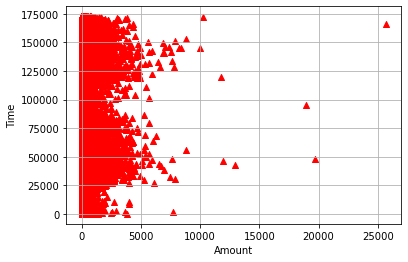

In [13]:
%matplotlib inline
plt.xlabel('Amount')
plt.ylabel('Time')
plt.grid()
plt.scatter(creditcard_data.Amount, creditcard_data.Time, color = 'red', marker = '^')
plt.show()

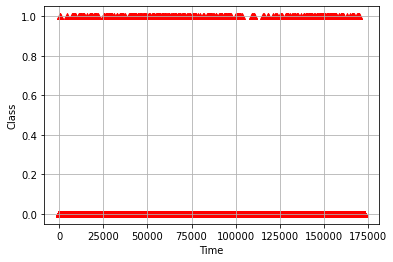

In [14]:
plt.xlabel('Time')
plt.ylabel('Class')
plt.grid()
plt.scatter(creditcard_data.Time, creditcard_data.Class, color = 'red', marker = '^')
plt.show()

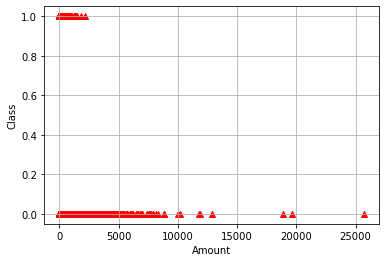

In [7]:
plt.xlabel('Amount')
plt.ylabel('Class')
plt.grid()
plt.scatter(creditcard_data.Amount, creditcard_data.Class, color = 'red', marker = '^')
plt.show()

In [8]:
# separating data for analysis
valid = creditcard_data[creditcard_data.Class == 0]
fraud = creditcard_data[creditcard_data.Class == 1] 

In [9]:
print(valid.shape)
print(fraud.shape)

(284315, 31)
(492, 31)


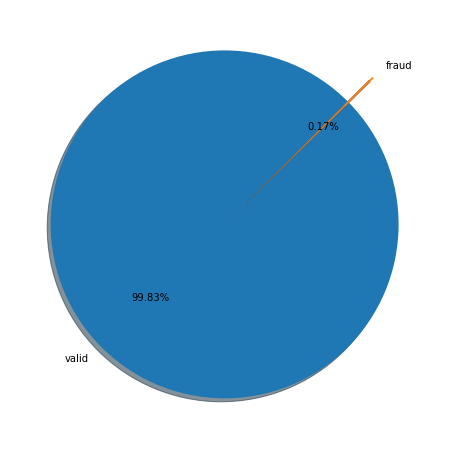

In [18]:
fig, ax1 = plt.subplots(figsize = (8,8))
label = ['valid', 'fraud']
value = [284315,492]
ax1.pie(x = value, labels = label, autopct='%.2f%%',shadow = True, startangle=45,explode=[0,.2] )
plt.show()

In [19]:
valid.Amount.describe()

count    284315.000000
mean         88.291022
std         250.105092
min           0.000000
25%           5.650000
50%          22.000000
75%          77.050000
max       25691.160000
Name: Amount, dtype: float64

In [20]:
fraud.Amount.describe()

count     492.000000
mean      122.211321
std       256.683288
min         0.000000
25%         1.000000
50%         9.250000
75%       105.890000
max      2125.870000
Name: Amount, dtype: float64

In [21]:
# compare the values for both transactions
creditcard_data.groupby('Class').mean()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount
Class,,,,,,,,,,,,,,,,,,,,,
0,94838.202258,0.008258,-0.006271,0.012171,-0.007860,0.005453,0.002419,0.009637,-0.000987,0.004467,...,-0.000644,-0.001235,-0.000024,0.000070,0.000182,-0.000072,-0.000089,-0.000295,-0.000131,88.291022
1,80746.806911,-4.771948,3.623778,-7.033281,4.542029,-3.151225,-1.397737,-5.568731,0.570636,-2.581123,...,0.372319,0.713588,0.014049,-0.040308,-0.105130,0.041449,0.051648,0.170575,0.075667,122.211321


In [12]:
# build a sample dataset 
valid_sample = valid.sample(n=492)

In [13]:
# concatenating two dataset
new_df = pd.concat([valid_sample, fraud], axis=0)

In [14]:
new_df.groupby('Class').mean()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount
Class,,,,,,,,,,,,,,,,,,,,,
0,96902.705285,0.029038,-0.094946,0.025112,0.030517,-0.009397,-0.011559,0.004486,-0.036363,-0.058980,...,0.011669,0.051733,0.009065,-0.019631,0.009973,0.010322,-0.002713,0.005504,-0.008340,97.389898
1,80746.806911,-4.771948,3.623778,-7.033281,4.542029,-3.151225,-1.397737,-5.568731,0.570636,-2.581123,...,0.372319,0.713588,0.014049,-0.040308,-0.105130,0.041449,0.051648,0.170575,0.075667,122.211321


In [15]:
#spliting the data
X = new_df.drop(columns='Class',axis = 1)
Y = new_df['Class']

In [16]:
print(Y)

226336    0
159928    0
116341    0
16995     0
89400     0
         ..
279863    1
280143    1
280149    1
281144    1
281674    1
Name: Class, Length: 984, dtype: int64


In [17]:
# train & test the data
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=.3, stratify=Y, random_state=2)

In [18]:
print(X.shape, X_test.shape, X_train.shape)

(984, 30) (296, 30) (688, 30)


In [19]:
# model training using logistic Regression
model = LogisticRegression()

In [20]:
model.fit(X_train, Y_train)

LogisticRegression()

In [21]:
i=model.score(X_train,Y_train)
j=model.score(X_test,Y_test)
print(i)  #taining accuracy score
print(j)  #testing accuracy score

0.9273255813953488
0.9087837837837838


In [22]:

print(model.predict(X_test))


[1 1 1 0 1 0 0 1 0 1 0 1 0 1 0 0 1 0 1 1 1 0 0 1 1 1 1 0 1 1 0 0 0 1 1 1 1
 0 1 0 1 0 0 0 1 0 0 0 0 0 0 0 1 0 0 1 1 0 1 0 0 0 1 0 0 1 0 1 1 1 0 0 0 0
 0 1 0 0 1 1 0 0 0 0 0 0 0 1 1 1 0 0 1 0 1 0 1 0 0 0 0 1 0 1 0 0 1 0 1 0 1
 0 0 0 1 0 1 0 0 0 1 0 1 0 0 0 1 0 0 0 1 1 0 0 1 0 0 1 0 0 0 0 1 1 1 0 1 1
 0 1 0 0 1 1 1 0 0 1 1 1 0 0 0 0 1 1 0 0 1 1 0 1 0 1 1 0 1 0 1 0 1 0 0 0 0
 1 0 0 1 0 0 1 1 1 0 0 0 0 0 1 0 0 0 1 0 1 1 1 0 1 0 0 0 1 1 1 1 1 1 1 1 1
 0 0 0 0 0 0 0 1 0 1 1 1 0 0 1 0 0 1 1 0 1 0 0 0 0 0 1 0 0 0 1 0 1 1 0 1 0
 0 0 0 0 1 0 0 0 1 1 1 0 0 0 0 1 0 1 1 1 1 1 1 1 0 0 0 0 0 0 0 0 0 0 0 1 0]


In [23]:
Y_test.value_counts()

0    148
1    148
Name: Class, dtype: int64

In [47]:
df = pd.read_csv('test.csv')
df.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount
0,0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,0.251412,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62
1,10,0.384978,0.616109,-0.874300,-0.094019,2.924584,3.317027,0.470455,0.538247,-0.558895,...,0.125992,0.049924,0.238422,0.009130,0.996710,-0.767315,-0.492208,0.042472,-0.054337,9.99
2,169351,-0.676143,1.126366,-2.213700,0.468308,-1.120541,-0.003346,-2.234739,1.210158,-0.652250,...,0.247968,0.751826,0.834108,0.190944,0.032070,-0.739695,0.471111,0.385107,0.194361,77.89


In [48]:
p = model.predict(df)
print(p) # we see the predction price according to the testing data


[0 0 1]


In [26]:
# Using random forest
from sklearn.ensemble import RandomForestClassifier

In [27]:
rclf = RandomForestClassifier()

In [28]:
rclf.fit(X_train, Y_train)

RandomForestClassifier()

In [29]:
i=rclf.score(X_train,Y_train)
j=rclf.score(X_test,Y_test)
print(i)  #taining accuracy score
print(j)  #testing accuracy score

1.0
0.9087837837837838


In [30]:
print(rclf.predict(X_test))

[1 1 1 0 1 0 0 1 0 1 0 1 0 1 0 0 1 0 1 1 1 1 0 1 1 1 1 0 1 1 0 0 0 1 1 1 1
 0 1 0 0 1 0 0 1 0 0 0 0 0 0 0 1 0 0 1 1 0 1 0 0 0 1 0 0 1 0 1 1 1 0 0 0 0
 0 1 0 0 1 1 0 0 0 0 1 0 0 1 1 1 0 0 1 0 1 0 1 0 0 0 0 1 0 1 0 0 1 0 1 0 1
 0 0 0 1 0 1 0 0 0 1 0 1 0 0 0 1 0 0 0 1 1 0 0 1 0 0 1 0 0 0 0 1 1 1 0 1 1
 0 1 0 0 1 1 0 0 0 1 1 1 0 0 0 0 1 1 0 0 1 0 0 1 1 1 1 0 1 0 1 0 1 0 0 0 0
 1 0 0 1 0 0 1 1 1 0 0 0 0 0 1 0 0 0 1 0 1 1 1 0 1 0 0 0 1 1 1 1 1 1 1 1 1
 0 0 0 0 0 0 0 1 0 1 1 1 0 1 1 0 0 1 1 0 1 0 0 0 0 0 1 0 1 0 1 0 1 1 1 1 0
 0 0 0 0 1 0 1 0 1 1 1 0 0 0 0 1 0 1 1 1 1 1 1 1 0 0 0 0 0 0 0 0 0 0 0 1 1]


In [32]:
# using decisin tree
from sklearn.tree import DecisionTreeClassifier

In [33]:
dclf = DecisionTreeClassifier()
dclf.fit(X_train,Y_train)

DecisionTreeClassifier()

In [34]:
i=dclf.score(X_train,Y_train)
j=dclf.score(X_test,Y_test)
print(i)  #taining accuracy score
print(j)  #testing accuracy score

1.0
0.8851351351351351
